# Feature Importance and Feature Selection With XGBoost in Python
---
A benefit of using ensembles of decision tree methods like gradient boosting is that they can automatically provide estimates of feature importance from a trained predictive model.

In this notebook we will discover how we can estimate the importance of features for a predictive modeling problem using the XGBoost library in Python.

> 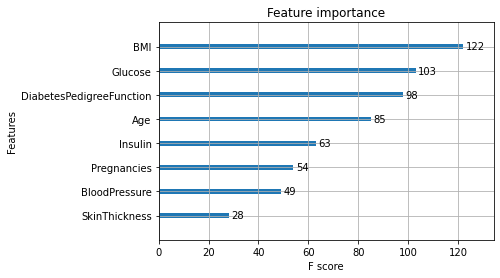

> ## Import Required Libraries

In [6]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
import seaborn as sns

> ## Load the Dataset

In [7]:
dataset = pd.read_csv('./diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

> ## Extracting Dependent and Independent Features

In [9]:
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

In [26]:
X.shape, y.shape

((768, 8), (768,))

In [17]:
feature_names = X.columns
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

> ## Let's split the data into training and testing sets

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

> ## Fit the Model on the Data

In [28]:
model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
y_pred = model.predict(X_test)

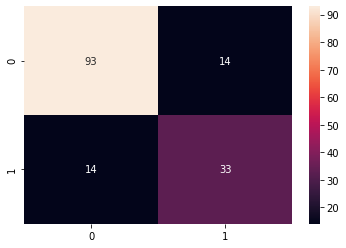

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

> ## Finding Feature Importance

In [11]:
print(model.feature_importances_)

[0.08265495 0.34031582 0.05761176 0.08581445 0.07284074 0.14332853
 0.08399398 0.13343978]


> ## Plotting the Feature Importances

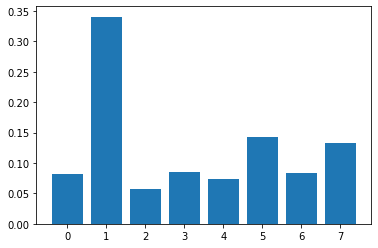

In [12]:
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show();

> ## Using the Built-in XGBoost Feature Importance Plot
Below is the code for plotting the feature importance for the Pima Indians dataset using the built-in `plot_importance()` function.

<Figure size 1440x432 with 0 Axes>

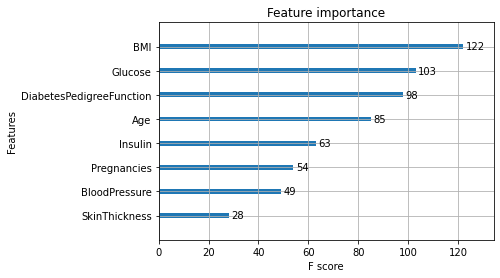

In [25]:
from xgboost import plot_importance

plot_importance(model)
pyplot.show()

> ## Feature Selection with XGBoost Feature Importance Scores
Feature importance scores can be used for feature selection in scikit-learn.

> This is done using the `SelectFromModel` class that takes a model and can transform a dataset into a subset with selected features.

> This class can take a pre-trained model, such as one trained on the entire training dataset. It can then use a threshold to decide which features to select. This threshold is used when you call the transform() method on the SelectFromModel instance to consistently select the same features on the training dataset and the test dataset.

> In the example below we first train and then evaluate an XGBoost model on the entire training dataset and test datasets respectively.

> Using the feature importances calculated from the training dataset, we then wrap the model in a SelectFromModel instance. We use this to select features on the training dataset, train a model from the selected subset of features, then evaluate the model on the testset, subject to the same feature selection scheme.

> ## Select Features using Threshold
For interest, we can test multiple thresholds for selecting features by feature importance. Specifically, the feature importance of each input variable, essentially allowing us to test each subset of features by importance, starting with all features and ending with a subset with the most important feature.

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

# selection = SelectFromModel(model, threshold=thresh, prefit=True)

Accuracy: 81.82%


> ## Fit model using each importance as a threshold

In [36]:
thresholds = sorted(model.feature_importances_)

for thresh in thresholds:

    # Select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)

    # Train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)

    # Evaluate model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print('Thresh = %.3f, no.of features = %d, Accuracy = %.2f%%' % (thresh, select_X_train.shape[1], accuracy * 100.0))

Thresh = 0.061, no.of features = 8, Accuracy = 81.82%
Thresh = 0.067, no.of features = 7, Accuracy = 82.47%
Thresh = 0.074, no.of features = 6, Accuracy = 83.12%
Thresh = 0.084, no.of features = 5, Accuracy = 84.42%
Thresh = 0.086, no.of features = 4, Accuracy = 82.47%
Thresh = 0.131, no.of features = 3, Accuracy = 80.52%
Thresh = 0.152, no.of features = 2, Accuracy = 79.22%
Thresh = 0.346, no.of features = 1, Accuracy = 77.27%


> # Summary
The model performed good with `5` features and a threshold value of `0.084`

> Reference: https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/